In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("bigdatamart_Train.csv")
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
data.shape

(8523, 12)

### Let's deal with the null values in two columns(Item_Weight,Outlet_Size)

In [6]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [11]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [12]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Checking the unique categories in each Categorical column

In [13]:
len(data['Item_Identifier'].unique())

1559

In [14]:
len(data['Item_Fat_Content'].unique())

5

In [15]:
len(data['Item_Type'].unique())

16

In [16]:
len(data['Outlet_Identifier'].unique())

10

In [17]:
len(data['Outlet_Size'].unique())

3

In [18]:
len(data['Outlet_Location_Type'].unique())

3

In [19]:
len(data['Outlet_Type'].unique())

4

In [20]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Let's deal with the 0 values in item_visibility column

In [21]:
data['Item_Visibility']=data['Item_Visibility'].replace(0.0,data['Item_Visibility'].mean())

In [22]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Encoding the dataset

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [24]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=LE.fit_transform(data[i])

In [25]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


### Let's visualize the continuous columns

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

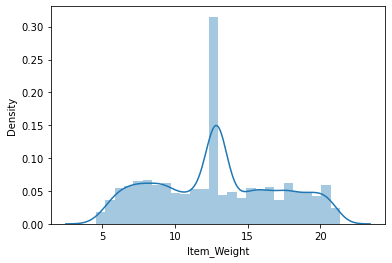

In [26]:
sns.distplot(data['Item_Weight'],kde=True)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

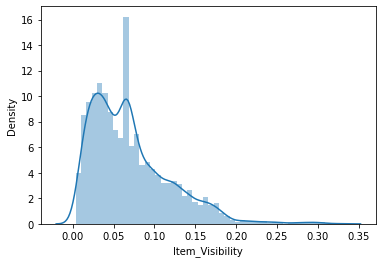

In [27]:
sns.distplot(data['Item_Visibility'],kde=True)

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

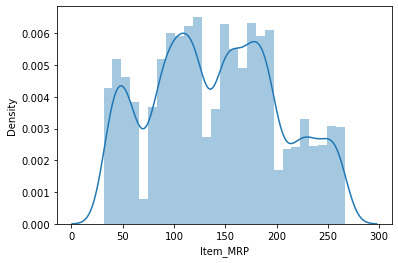

In [28]:
sns.distplot(data['Item_MRP'],kde=True)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

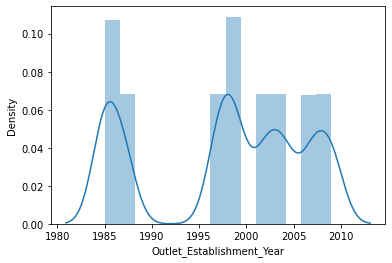

In [29]:
sns.distplot(data['Outlet_Establishment_Year'],kde=True)

### Now Let's Check the correlation of the features with the target variable 

In [36]:
data.corr()['Item_Outlet_Sales']

Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Visibility             -0.134138
Item_Type                    0.017048
Item_MRP                     0.567574
Outlet_Identifier            0.162325
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

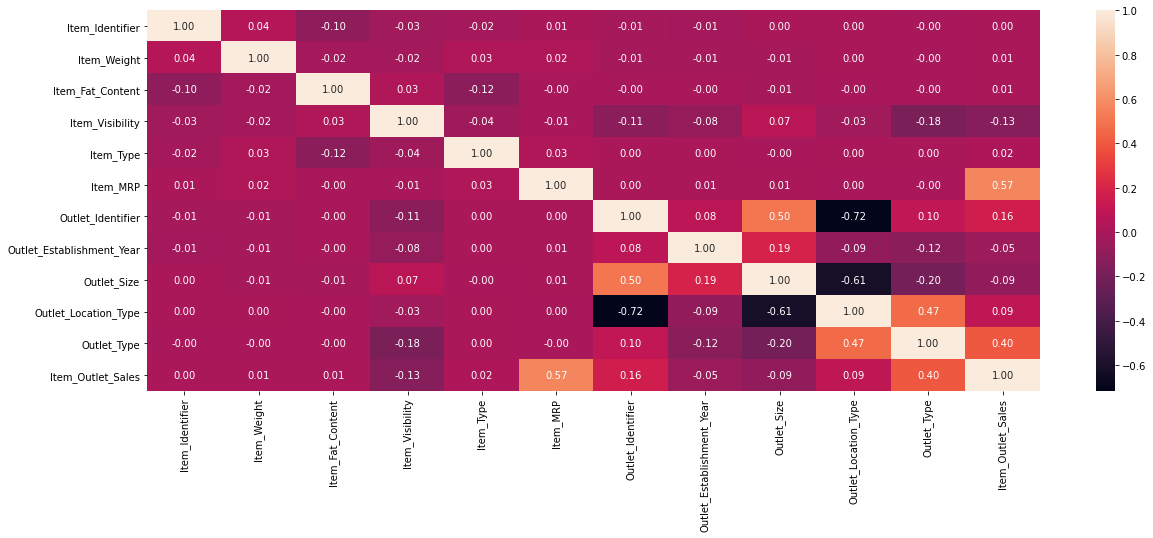

In [32]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,fmt="0.2f")

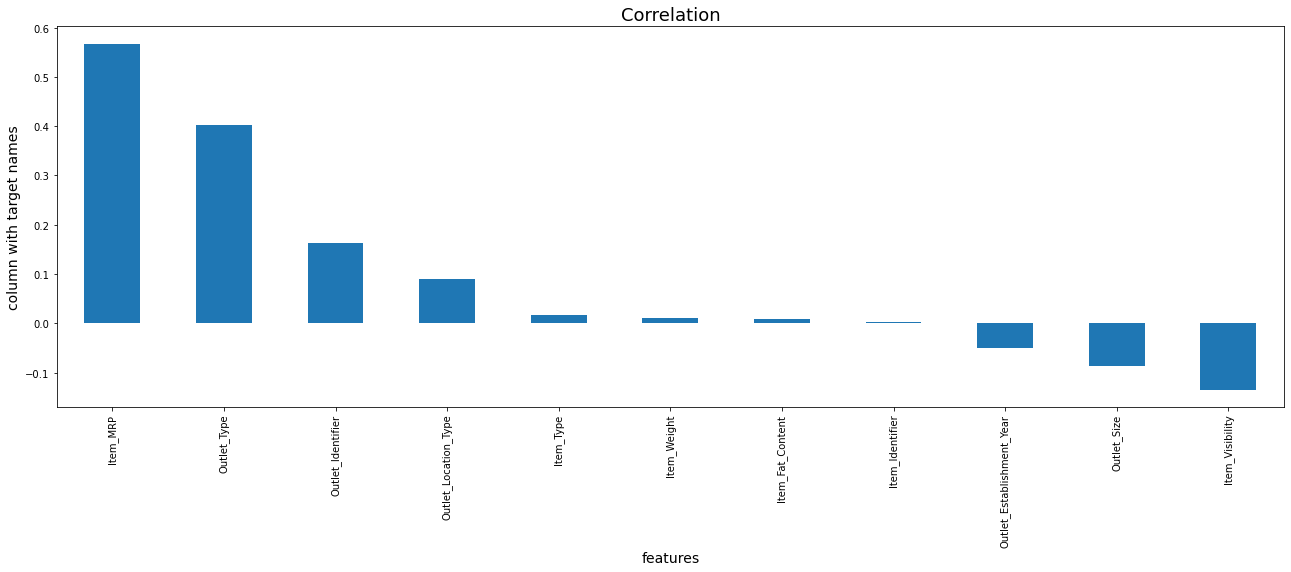

In [37]:
plt.figure(figsize=(22,7))
data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

We can clearly see that Item_Identifier , Item_Weight , Item_Fat_Content has no relationship with the target variable so we remove them drom the dataset        

In [38]:
data_new=data.drop(columns=['Item_Identifier','Item_Weight','Item_Fat_Content'])

In [39]:
data_new

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


### Checking for outliers

<AxesSubplot:>

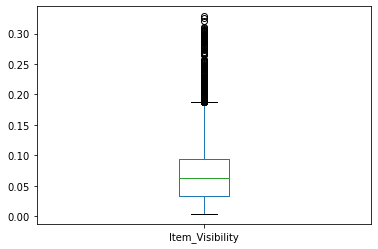

In [40]:
data_new['Item_Visibility'].plot.box()

<AxesSubplot:>

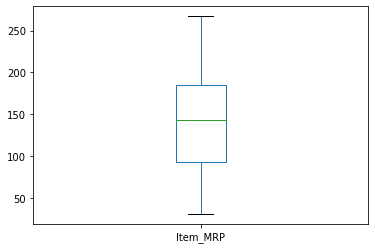

In [41]:
data_new['Item_MRP'].plot.box()

In [43]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(data_new))

In [55]:
data_new_z=data_new[(z<2.5).all(axis=1)]

In [56]:
data_new_z

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


<AxesSubplot:>

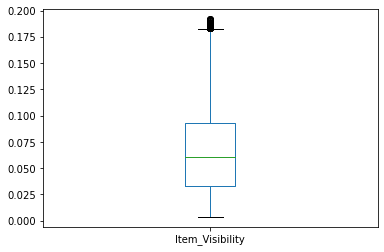

In [57]:
data_new_z['Item_Visibility'].plot.box()

### Skewness

In [58]:
data_new_z.skew()

Item_Visibility              0.797259
Item_Type                    0.097807
Item_MRP                     0.152720
Outlet_Identifier           -0.069541
Outlet_Establishment_Year   -0.440316
Outlet_Size                 -0.089082
Outlet_Location_Type        -0.194543
Outlet_Type                  0.975076
Item_Outlet_Sales            0.758773
dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

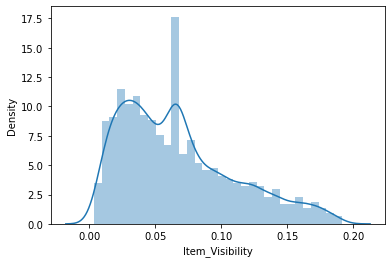

In [59]:
sns.distplot(data_new_z['Item_Visibility'],kde=True)

### Dividing dataset into features and label

In [61]:
x=data_new_z.drop(columns=['Item_Outlet_Sales'],axis=1)
y=data_new_z['Item_Outlet_Sales']

In [62]:
x

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.016047,4,249.8092,9,1999,1,0,1
1,0.019278,14,48.2692,3,2009,1,2,2
2,0.016760,10,141.6180,9,1999,1,0,1
3,0.066132,6,182.0950,0,1998,1,2,0
4,0.066132,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...
8518,0.056783,13,214.5218,1,1987,0,2,1
8519,0.046982,0,108.1570,7,2002,1,1,1
8520,0.035186,8,85.1224,6,2004,2,1,1
8521,0.145221,13,103.1332,3,2009,1,2,2


In [63]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8173, dtype: float64

### Scaling the data using standard scaler

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR=LinearRegression()

### Training the model

In [70]:
LR.fit(x_scaled,y)

LinearRegression()

In [92]:
predict=LR.predict(x_scaled)

In [93]:
score=r2_score(y,predict)

In [94]:
score

-70.25201456000595

In [68]:
from sklearn.model_selection import cross_val_score

In [72]:
cvs=cross_val_score(LR,x_scaled,y,cv=5)
print(cvs.mean())

0.48569879480226047


### Now importing the testing data file

In [73]:
data_test=pd.read_csv('bigdatamart_test.csv')

In [74]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [76]:
data_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Let's deal with the null values in two columns(Item_Weight,Outlet_Size)

In [78]:
data_test['Item_Weight']=data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean())

In [79]:
data_test['Outlet_Size']=data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0])

In [80]:
data_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [81]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Let's deal with the 0 values in item_visibility column

In [82]:
data_test['Item_Visibility']=data_test['Item_Visibility'].replace(0.0,data_test['Item_Visibility'].mean())

In [83]:
data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.069765,141.023273,1997.828903
std,4.245189,0.048394,61.809091,8.372256
min,4.555000,0.003591,31.990000,1985.000000
25%,9.195000,0.033208,94.412000,1987.000000
50%,12.695633,0.062137,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Encoding the dataset

In [84]:
for i in data_test.columns:
    if data_test[i].dtypes=='object':
        data_test[i]=LE.fit_transform(data_test[i])

In [85]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300000,2,0.065684,3,214.6218,2,2007,1,1,1


In [86]:
data_new_test=data_test.drop(columns=['Item_Identifier','Item_Weight','Item_Fat_Content'])

In [87]:
data_new_test

,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.007565,13,107.8622,9,1999,1,0,1
1,0.038428,4,87.3198,2,2007,1,1,1
2,0.099575,11,241.7538,0,1998,1,2,0
3,0.015388,13,155.0340,2,2007,1,1,1
4,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...
5676,0.013496,13,141.3154,8,1997,2,0,1
5677,0.142991,15,169.1448,3,2009,1,2,2
5678,0.073529,8,118.7440,7,2002,1,1,1
5679,0.065684,3,214.6218,2,2007,1,1,1


### scaling the dataset

In [88]:
data_new_test_scaled=scaler.fit_transform(data_new_test)

In [89]:
prediction=LR.predict(data_new_test_scaled)